Napisz program wyliczający wpływ społeczny w chwili t = 0 w wersji deterministycznej (bez szumu)
dla siatki pokazanej na rys. 1. Wypisz otrzymane wartości dla każdego z aktorów pochodzące od każdej
opinii. Na jego podstawie dokonaj zmian opinii w kilku kolejnych krokach symulacji.

ZAD 1: dla siatki z rysunku nr 1 wypisz otrzymane wartości dla każdego z aktorów z każdej opinii, kilka kolejnych kroków (np. 3). Aktualizuj siatkę. 
Zrób mapy z opiniami i wpływami od każdej chwili w kolejnych chwilach czasowych

# 3x3 - inicjacja tablic, spisanie pozycji, S i P

In [1]:
from math import sqrt
from math import pow
from math import floor
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
l = 3 #długość boku
tableT1 = ["c","z","c","c","n","n","c","z","n"] #tablica dla stanu t
tableT2 = [] #tablica dla stanu t+1
tableS = [] #tabela trzymająca wartości "odporności" każdego
tableP = [] #tablea trzymająca wartości "perswazji/wpływu" dla każdego
tableOdl = [] #tabela trzymająca tabele z odległościami
a = 2 #ten współczynnik odległości

#robisz na początku listy gdzie jest c, n, z
#liczysz dla każdego punktu moc, masz listę z miejscem każdego koloru więc wiesz jaka ta moc

In [5]:
tableC = [] #tablica trzymająca impact C dla planszy, czyszczenie jej
tableZ = [] #tablica trzymająca impact Z dla planszy, czyszczenie jej
tableN = [] #tablica trzymająca impact N dla planszy, czyszczenie jej
counter = 0
#spisanie pozycji (czyli praktycznie i) każdego kolorku
while counter < l*l:
    if tableT1[counter]=="c":
        tableC.append(counter)
    elif tableT1[counter]=="n":
        tableN.append(counter)
    elif tableT1[counter]=="z":
        tableZ.append(counter)
    counter = counter + 1

In [6]:
#determinujemy z góry S i P
tableS = [] #tabela trzymająca wartości "odporności" każdego
tableP = [] #tablea trzymająca wartości "perswazji/wpływu" dla każdego
for x in range (0,l*l):
    losowe = (x+1)/10
    tableS.append(losowe) #wylosowanie odpornosci i mocy opinii dla każdego
    tableP.append(1-losowe)

# Odległość - funkcje

In [2]:
#funkcja licząca odległość między dwoma punktami i od razu robi kawałek wzoru bo się przecież nie zmieni
#najwyżej usunę to a, bywa
def odleglosc(cel, pochodzenie, l,a):
    #x - robię modulo z obu do l i czy są równe, jak nie to abs różnica to x
    #y - dzielę na l i zaokrąglam w dół, abs różnica to y
    x = abs(cel%l-pochodzenie%l)
    y = abs(floor(cel/l)-floor(pochodzenie/l))
    result = 1+pow(sqrt(x*x+y*y),a) #oddajemy już cały dół bo nie ma sensu to później liczyć
    return result

In [3]:
#dla każdego punktu przechodzę przez każdy punkt i wyliczam odl, dodaje do tabTemp
#jak skończę wszystkie punkty to append w ogólnej tablicy i biorę się za następny punkt i wb. niego odległość
counter = 0
while counter < l*l:
    counter2 = 0
    tableTemp = []
    while counter2 <l*l:
        odl = odleglosc(counter2,counter,l,a)
        tableTemp.append(odl)
        counter2 = counter2 + 1
    tableOdl.append(tableTemp)
    counter = counter + 1

# Wpływy - funkcje

In [4]:
def wplywP(cel, moc, tablica):
    #wplyw obcego koloru
    #w "tablica" są nr punktu, dla których trzeba znaleźć odległość w tabOdl wb "cel"
    #również na bazie "tablica" dla każdego trzeba znaleźć moc perswazji
    #podstawić do wzoru, suma i jazda
    suma = 0
    for x in tablica:
        suma = suma + (moc[x]/tableOdl[cel][x])
    return 4*suma

In [5]:
def wplywS(cel, moc, tablica):
    #wplyw swojego koloru, ma znaczenie bo siebie tez doliczasz czy cos i inny wzór
    #w "tablica" są nr punktu, dla których trzeba znaleźć odległość w tabOdl wb "cel"
    #również na bazie "tablica" dla każdego trzeba znaleźć moc ochrony/zachowania koloru
    #podstawić do wzoru, suma i jazdai
    suma = 0
    for x in tablica:
        suma = suma + (moc[x]/tableOdl[cel][x])
    return 4*suma

# Obrazy - funkcje

In [6]:
#opinie
def mapy_opinii(tableSave, l):
    kolory = {
        'n': (0, 0, 255),  # Niebieski
        'c': (255, 0, 0),  # Czerwony
        'z': (0, 255, 0)   # Zielony
    }
    counter = 0
    for tablica in tableSave:
        tablica = np.array(tablica).reshape(l, l)
        # Przekształcanie tablicy wartości na kolory
        kolorowa_tablica = np.array([[kolory[wartosc] for wartosc in wiersz] for wiersz in tablica])
        plt.imshow(kolorowa_tablica)
        plt.axis('off')  # Wyłączenie osi
        #anim = FuncAnimation(fig, update, frames=len(tableSave), interval=500, blit=True)
        savefile = "map_"+str(counter)+".png"
        plt.savefig(savefile)
        plt.show()
        counter = counter + 1

In [7]:
#wizualizacja - wartości na tablicy i wpływy każdego kolorku - nie no to to nie xdd
def mapy_wplywuL(tableCinflu, tableZinflu, tableNinflu,l):
    #czerwone
    counter = 0
    for tablica in tableCinflu:
        tablica_3x3 = np.array(tablica).reshape(l, l)
        # Wizualizacja
        fig, ax = plt.subplots()
        for i in range(l):
            for j in range(l):
                # Dodanie czerwonego prostokąta (tło)
                ax.add_patch(Rectangle((j, (l-1) - i), 1, 1, color='red'))  # 2 - i odwraca pozycję wierszy
                # Dodanie literki w odpowiednim miejscu (na czerwonym tle)
                ax.text(j + 0.5, 2 - i + 0.5, tablica_3x3[i, j], ha='center', va='center', fontsize=20, color='white')        
        # Ustawienie granic wykresu
        ax.set_xlim(0, 3)
        ax.set_ylim(0, 3)
        # Wyłączenie osi
        plt.axis('off')
        savefile = "inflC_"+str(counter)+".png"
        plt.savefig(savefile)
        plt.show()
        counter = counter + 1
    #zielone    
    counter = 0
    for tablica in tableZinflu:
        tablica_3x3 = np.array(tablica).reshape(l, l)
        # Wizualizacja
        fig, ax = plt.subplots()
        for i in range(l):
            for j in range(l):
                # Dodanie czerwonego prostokąta (tło)
                ax.add_patch(Rectangle((j, (l-1) - i), 1, 1, color='green'))  # 2 - i odwraca pozycję wierszy
                # Dodanie literki w odpowiednim miejscu (na czerwonym tle)
                ax.text(j + 0.5, 2 - i + 0.5, tablica_3x3[i, j], ha='center', va='center', fontsize=20, color='white')        
        # Ustawienie granic wykresu
        ax.set_xlim(0, 3)
        ax.set_ylim(0, 3)
        # Wyłączenie osi
        plt.axis('off')
        savefile = "inflZ_"+str(counter)+".png"
        plt.savefig(savefile)
        plt.show()
        counter = counter + 1
    #niebieskie
    counter = 0
    for tablica in tableNinflu:
        tablica_3x3 = np.array(tablica).reshape(l,l)
        # Wizualizacja
        fig, ax = plt.subplots()
        for i in range(l):
            for j in range(l):
                # Dodanie czerwonego prostokąta (tło)
                ax.add_patch(Rectangle((j, (l-1)- i), 1, 1, color='blue'))  # 2 - i odwraca pozycję wierszy
                # Dodanie literki w odpowiednim miejscu (na czerwonym tle)
                ax.text(j + 0.5, 2 - i + 0.5, tablica_3x3[i, j], ha='center', va='center', fontsize=20, color='white')        
        # Ustawienie granic wykresu
        ax.set_xlim(0, 3)
        ax.set_ylim(0, 3)
        # Wyłączenie osi
        plt.axis('off')
        savefile = "inflC_"+str(counter)+".png"
        plt.savefig(savefile)
        plt.show()
        counter = counter + 1

# Wyliczanie 3x3 i wizualizacje

In [13]:
#ZAPAS Z GÓRY
#sprawdzanie wpływów na punkt
#po policzeniu wpływu wybieramy kto ma największy wpływ na dany punkt
#jak będzie wiadomo to na miejsce w tableT2
#na koniec tableT1 = tableT2; TableT2 = []
tableSave = [] #tablica w której zapisuję poszczególne stany naszej planszy
tableSave.append(tableT1) #zapis stanu początkowego
tableCinfluALL = [] #tablica w której będę umieszczał ogólne wpływy czerwonych na każde pole w każdym kroku czasowym
tableNinfluALL = [] #to samo, dla niebieskich
tableZinfluALL = [] #to samo, dla zielonych
counterZew = 0 #zewnętrzny licznik do kontrolowania ilości kroków czasowych do wykonania
while counterZew < 5:
    tableCinflu = [] #tablica w której będę umieszczał wpływy czerwonych na pojedyncze pola, potem push do tablicy ALL i czyszczenie
    tableNinflu = [] #to samo, dla niebieskich
    tableZinflu = [] #to samo, dla zielonych
    counter = 0
    while counter < l*l:
        if tableT1[counter]=="c":
            c=wplywS(counter, tableS,tableC)
            z=wplywP(counter, tableP,tableZ)
            n=wplywP(counter, tableP,tableN)
        elif tableT1[counter]=="z":
            c=wplywP(counter, tableP,tableC)
            z=wplywS(counter, tableS,tableZ)
            n=wplywP(counter, tableP,tableN)
        else:
            c=wplywP(counter, tableP,tableC)
            z=wplywP(counter, tableP,tableZ)
            n=wplywS(counter, tableS,tableN)
        tableCinflu.append(round(c,2))
        tableNinflu.append(round(n,2))
        tableZinflu.append(round(z,2))
        #print(counter, tableT1[counter],"c:",c,"z:",z,"n",n)
        if max(c,z,n)==c:
            #tableT2[counter]=="c"
            #print("c",c,"dla counter:",counter)
            tableT2.append("c")
        elif max(z,n) == n:
            #tableT2[counter]=="n"
            #print("n",n,"dla counter:",counter)
            tableT2.append("n")
        else:
            #tableT2[counter]=="z"
            #print("z",z,"dla counter:",counter)
            tableT2.append("z")
        counter = counter + 1
        #print("***")
    tableT1 = tableT2
    tableT2 = []
    tableSave.append(tableT1)
    tableC = [] #tablica trzymająca impact C dla planszy, czyszczenie jej
    tableZ = [] #tablica trzymająca impact Z dla planszy, czyszczenie jej
    tableN = [] #tablica trzymająca impact N dla planszy, czyszczenie jej
    counter = 0
    #spisanie pozycji (czyli praktycznie i) każdego kolorku, bo trzeba aktualizować
    while counter < l*l:
        if tableT1[counter]=="c":
            tableC.append(counter)
        elif tableT1[counter]=="n":
            tableN.append(counter)
        elif tableT1[counter]=="z":
            tableZ.append(counter)
        counter = counter + 1
    tableCinfluALL.append(tableCinflu)#zapis tablicy wpływu do archiwów dla czerwonego
    tableNinfluALL.append(tableNinflu)
    tableZinfluALL.append(tableZinflu)
    counterZew = counterZew + 1

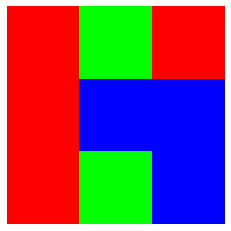

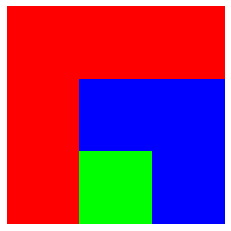

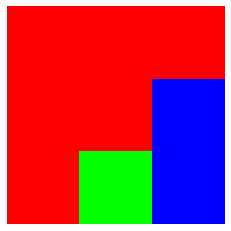

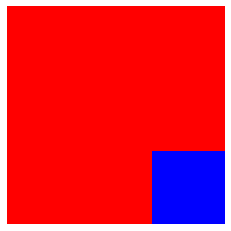

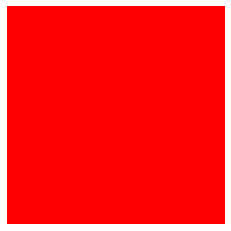

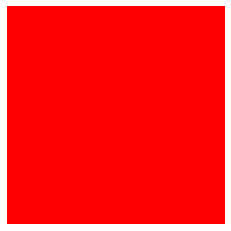

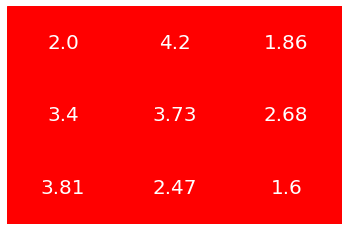

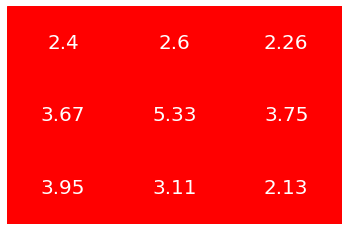

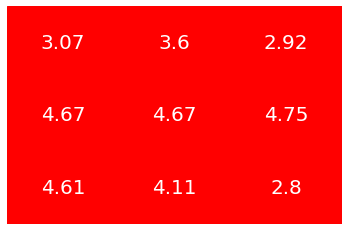

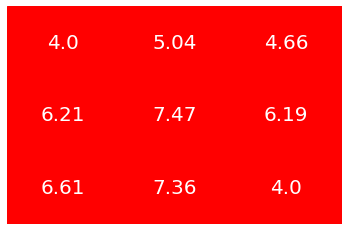

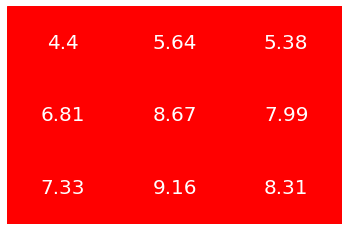

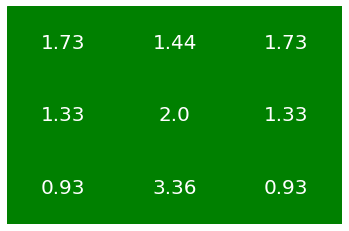

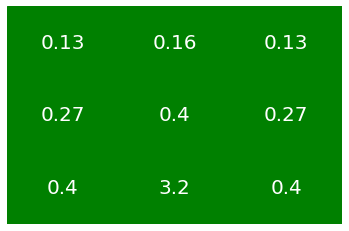

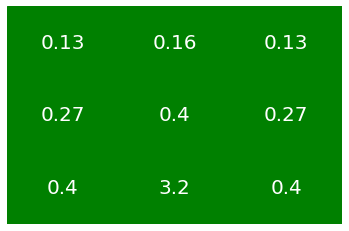

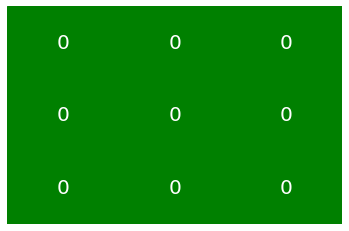

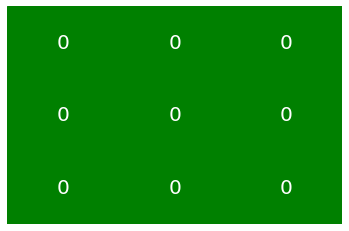

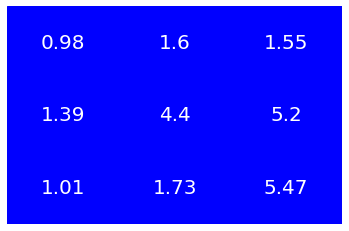

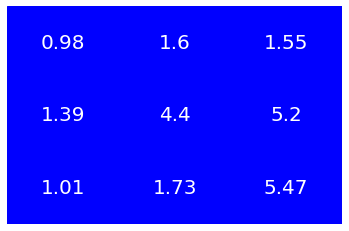

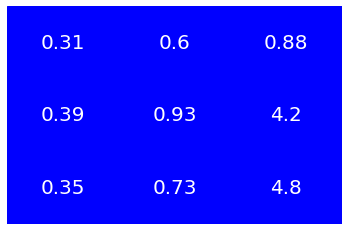

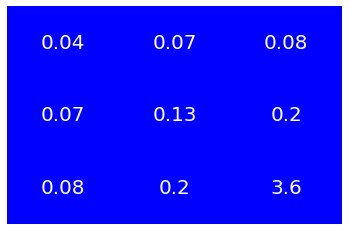

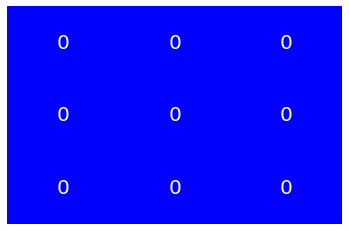

In [23]:
mapy_opinii(tableSave,l)
mapy_wplywuL(tableCinfluALL, tableZinfluALL, tableNinfluALL,l)

ZAD 2: powiększ do 20x20. Wylosuj P i S i początkową opinię. a = 2, K=3 [liczba opinii], T=0 [szum]. Deterministyczna symulacja wypisując w kolejnych chwilach czasowych tablicę opinii przyjętych przez aktorów.
Mapy/animacja kolejnych chwil czasowych

# 20x20- inicjacja tablic, spisanie pozycji, S i P, odległość i wgl

In [8]:
l = 20 #długość boku
tableT1 = [] #tablica dla stanu t
tableT2 = [] #tablica dla stanu t+1
tableS = [] #tabela trzymająca wartości "odporności" każdego
tableP = [] #tablea trzymająca wartości "perswazji/wpływu" dla każdego
tableOdl = [] #tabela trzymająca tabele z odległościami
a = 2 #ten współczynnik odległości

#robisz na początku listy gdzie jest c, n, z
#liczysz dla każdego punktu moc, masz listę z miejscem każdego koloru więc wiesz jaka ta moc

In [9]:
#losowe przyporządkowanie
counter = 0
tableT1 = []
while counter < l*l:
    x = random.randrange(1, 4)
    if x == 1:
        tableT1.append("c")
    elif x==2:
        tableT1.append("n")
    else:
        tableT1.append("z")
    counter = counter + 1

In [10]:
tableC = [] #tablica trzymająca impact C dla planszy, czyszczenie jej
tableZ = [] #tablica trzymająca impact Z dla planszy, czyszczenie jej
tableN = [] #tablica trzymająca impact N dla planszy, czyszczenie jej
counter = 0
#spisanie pozycji (czyli praktycznie i) każdego kolorku
while counter < l*l:
    if tableT1[counter]=="c":
        tableC.append(counter)
    elif tableT1[counter]=="n":
        tableN.append(counter)
    elif tableT1[counter]=="z":
        tableZ.append(counter)
    counter = counter + 1

In [11]:
#losowa perswazja i odporność
tableS = [] #tabela trzymająca wartości "odporności" każdego
tableP = [] #tablea trzymająca wartości "perswazji/wpływu" dla każdego
for x in range (0,l*l):
    losowe = random.random()
    tableS.append(losowe) #wylosowanie odpornosci i mocy opinii dla każdego
    losowe = random.random()
    tableP.append(losowe)

In [12]:
#dla każdego punktu przechodzę przez każdy punkt i wyliczam odl, dodaje do tabTemp
#jak skończę wszystkie punkty to append w ogólnej tablicy i biorę się za następny punkt i wb. niego odległość
counter = 0
while counter < l*l:
    counter2 = 0
    tableTemp = []
    while counter2 <l*l:
        odl = odleglosc(counter2,counter,l,a)
        tableTemp.append(odl)
        counter2 = counter2 + 1
    tableOdl.append(tableTemp)
    counter = counter + 1

# 20x20 liczenie

In [13]:
#ZAPAS Z GÓRY
#sprawdzanie wpływów na punkt
#po policzeniu wpływu wybieramy kto ma największy wpływ na dany punkt
#jak będzie wiadomo to na miejsce w tableT2
#na koniec tableT1 = tableT2; TableT2 = []
tableSave = [] #tablica w której zapisuję poszczególne stany naszej planszy
tableSave.append(tableT1) #zapis stanu początkowego
counterZew = 0 #zewnętrzny licznik do kontrolowania ilości kroków czasowych do wykonania
while counterZew < 50:
    counter = 0
    while counter < l*l:
        if tableT1[counter]=="c":
            c=wplywS(counter, tableS,tableC)
            z=wplywP(counter, tableP,tableZ)
            n=wplywP(counter, tableP,tableN)
        elif tableT1[counter]=="z":
            c=wplywP(counter, tableP,tableC)
            z=wplywS(counter, tableS,tableZ)
            n=wplywP(counter, tableP,tableN)
        else:
            c=wplywP(counter, tableP,tableC)
            z=wplywP(counter, tableP,tableZ)
            n=wplywS(counter, tableS,tableN)
        #print(counter, tableT1[counter],"c:",c,"z:",z,"n",n)
        if max(c,z,n)==c:
            #tableT2[counter]=="c"
            #print("c",c,"dla counter:",counter)
            tableT2.append("c")
        elif max(z,n) == n:
            #tableT2[counter]=="n"
            #print("n",n,"dla counter:",counter)
            tableT2.append("n")
        else:
            #tableT2[counter]=="z"
            #print("z",z,"dla counter:",counter)
            tableT2.append("z")
        counter = counter + 1
        #print("***")
    tableT1 = tableT2
    tableT2 = []
    tableSave.append(tableT1)
    tableC = [] #tablica trzymająca impact C dla planszy, czyszczenie jej
    tableZ = [] #tablica trzymająca impact Z dla planszy, czyszczenie jej
    tableN = [] #tablica trzymająca impact N dla planszy, czyszczenie jej
    counter = 0
    #spisanie pozycji (czyli praktycznie i) każdego kolorku, bo trzeba aktualizować
    while counter < l*l:
        if tableT1[counter]=="c":
            tableC.append(counter)
        elif tableT1[counter]=="n":
            tableN.append(counter)
        elif tableT1[counter]=="z":
            tableZ.append(counter)
        counter = counter + 1
    counterZew = counterZew + 1

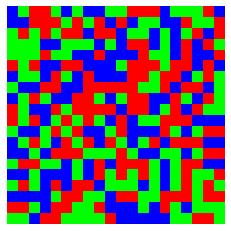

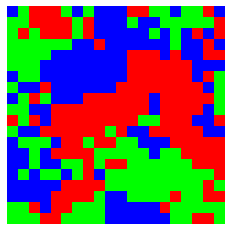

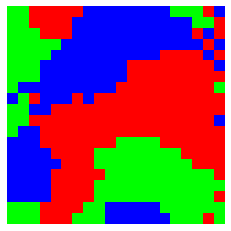

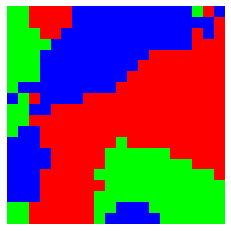

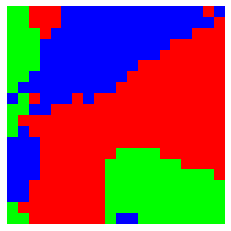

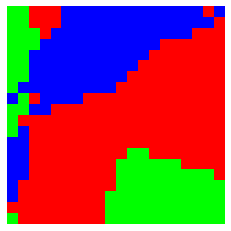

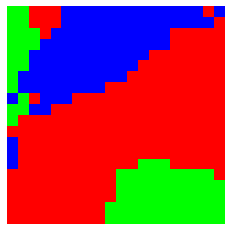

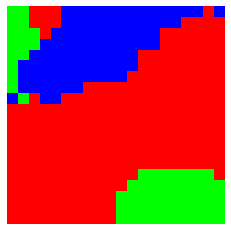

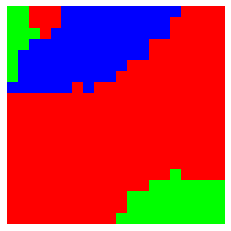

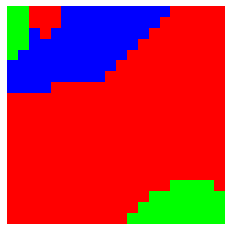

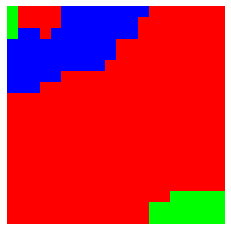

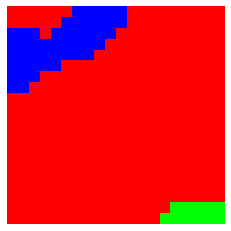

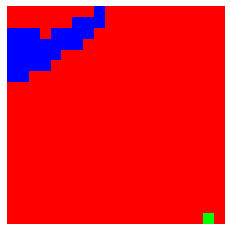

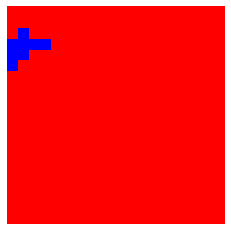

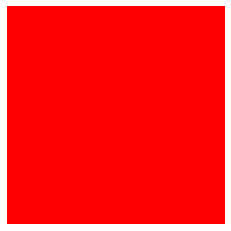

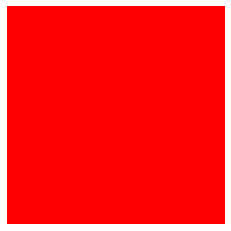

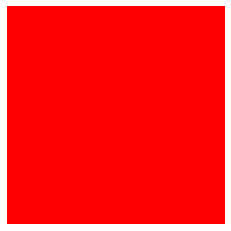

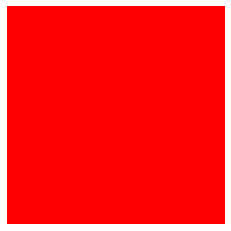

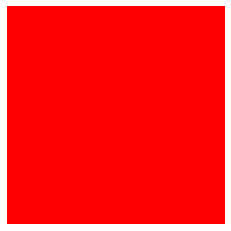

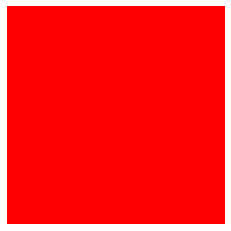

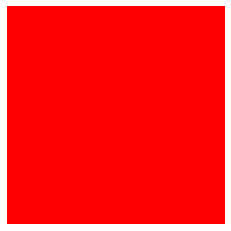

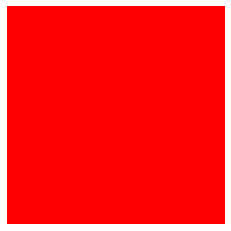

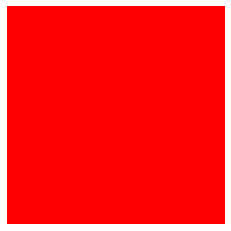

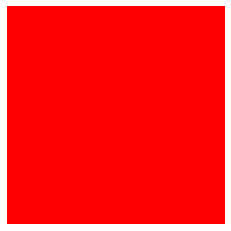

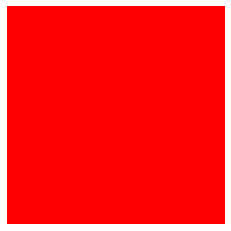

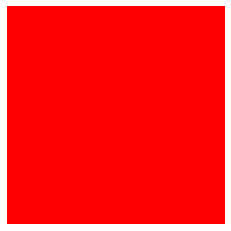

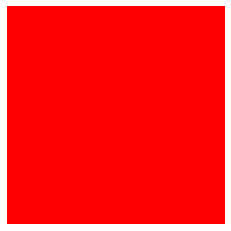

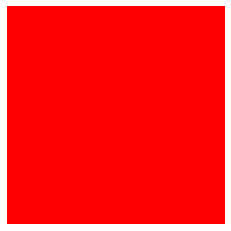

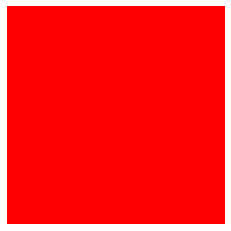

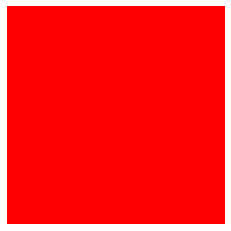

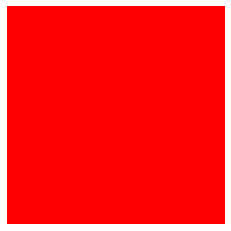

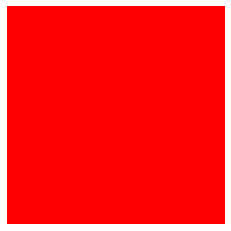

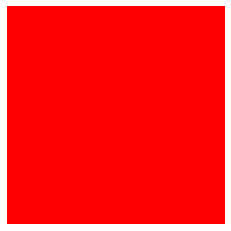

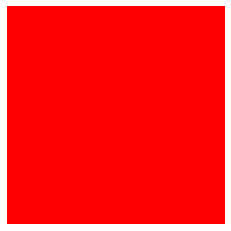

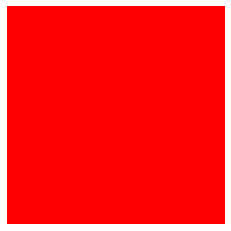

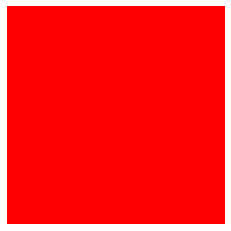

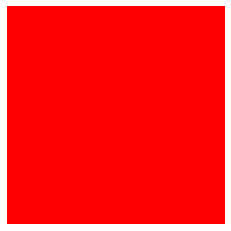

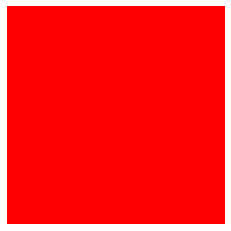

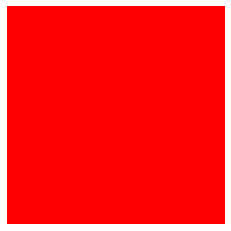

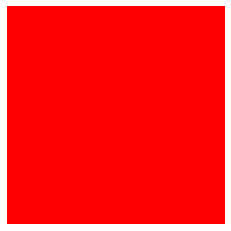

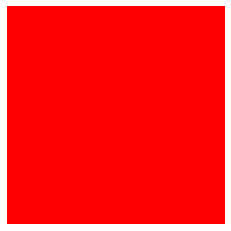

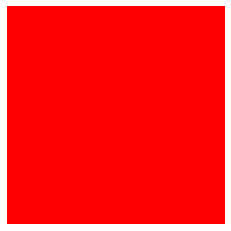

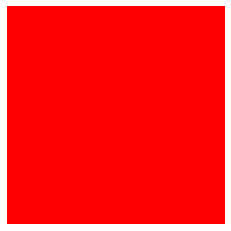

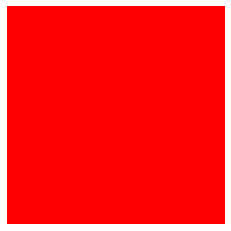

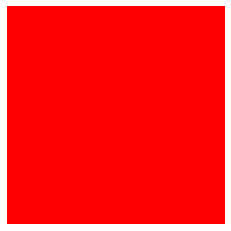

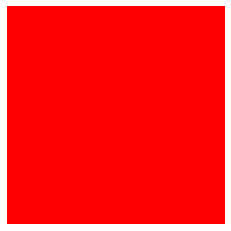

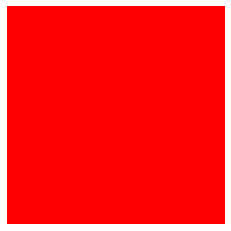

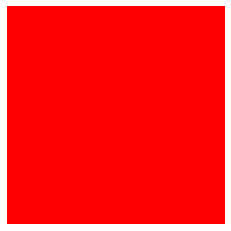

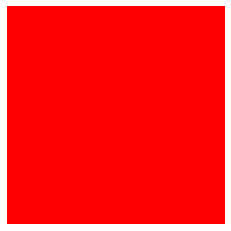

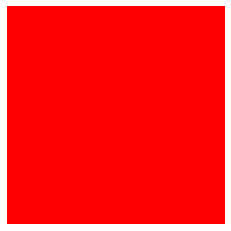

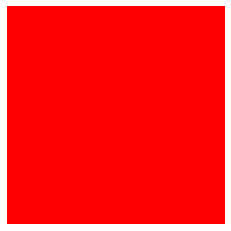

In [14]:
mapy_opinii(tableSave, l)

ZAD 3: zadanie 2, ale dla a=3

# 20x20, a=3

In [15]:
l = 20 #długość boku
tableT1 = [] #tablica dla stanu t
tableT2 = [] #tablica dla stanu t+1
tableS = [] #tabela trzymająca wartości "odporności" każdego
tableP = [] #tablea trzymająca wartości "perswazji/wpływu" dla każdego
tableOdl = [] #tabela trzymająca tabele z odległościami
a = 3 #ten współczynnik odległości

#robisz na początku listy gdzie jest c, n, z
#liczysz dla każdego punktu moc, masz listę z miejscem każdego koloru więc wiesz jaka ta moc

In [16]:
#losowe przyporządkowanie
counter = 0
tableT1 = []
while counter < l*l:
    x = random.randrange(1, 4)
    if x == 1:
        tableT1.append("c")
    elif x==2:
        tableT1.append("n")
    else:
        tableT1.append("z")
    counter = counter + 1

In [17]:
tableC = [] #tablica trzymająca impact C dla planszy, czyszczenie jej
tableZ = [] #tablica trzymająca impact Z dla planszy, czyszczenie jej
tableN = [] #tablica trzymająca impact N dla planszy, czyszczenie jej
counter = 0
#spisanie pozycji (czyli praktycznie i) każdego kolorku
while counter < l*l:
    if tableT1[counter]=="c":
        tableC.append(counter)
    elif tableT1[counter]=="n":
        tableN.append(counter)
    elif tableT1[counter]=="z":
        tableZ.append(counter)
    counter = counter + 1

In [18]:
#losowa perswazja i odporność
tableS = [] #tabela trzymająca wartości "odporności" każdego
tableP = [] #tablea trzymająca wartości "perswazji/wpływu" dla każdego
for x in range (0,l*l):
    losowe = random.random()
    tableS.append(losowe) #wylosowanie odpornosci i mocy opinii dla każdego
    losowe = random.random()
    tableP.append(losowe)

In [19]:
#dla każdego punktu przechodzę przez każdy punkt i wyliczam odl, dodaje do tabTemp
#jak skończę wszystkie punkty to append w ogólnej tablicy i biorę się za następny punkt i wb. niego odległość
counter = 0
while counter < l*l:
    counter2 = 0
    tableTemp = []
    while counter2 <l*l:
        odl = odleglosc(counter2,counter,l,a)
        tableTemp.append(odl)
        counter2 = counter2 + 1
    tableOdl.append(tableTemp)
    counter = counter + 1

In [20]:
#ZAPAS Z GÓRY
#sprawdzanie wpływów na punkt
#po policzeniu wpływu wybieramy kto ma największy wpływ na dany punkt
#jak będzie wiadomo to na miejsce w tableT2
#na koniec tableT1 = tableT2; TableT2 = []
tableSave = [] #tablica w której zapisuję poszczególne stany naszej planszy
tableSave.append(tableT1) #zapis stanu początkowego
counterZew = 0 #zewnętrzny licznik do kontrolowania ilości kroków czasowych do wykonania
while counterZew < 50:
    counter = 0
    while counter < l*l:
        if tableT1[counter]=="c":
            c=wplywS(counter, tableS,tableC)
            z=wplywP(counter, tableP,tableZ)
            n=wplywP(counter, tableP,tableN)
        elif tableT1[counter]=="z":
            c=wplywP(counter, tableP,tableC)
            z=wplywS(counter, tableS,tableZ)
            n=wplywP(counter, tableP,tableN)
        else:
            c=wplywP(counter, tableP,tableC)
            z=wplywP(counter, tableP,tableZ)
            n=wplywS(counter, tableS,tableN)
        #print(counter, tableT1[counter],"c:",c,"z:",z,"n",n)
        if max(c,z,n)==c:
            #tableT2[counter]=="c"
            #print("c",c,"dla counter:",counter)
            tableT2.append("c")
        elif max(z,n) == n:
            #tableT2[counter]=="n"
            #print("n",n,"dla counter:",counter)
            tableT2.append("n")
        else:
            #tableT2[counter]=="z"
            #print("z",z,"dla counter:",counter)
            tableT2.append("z")
        counter = counter + 1
        #print("***")
    tableT1 = tableT2
    tableT2 = []
    tableSave.append(tableT1)
    tableC = [] #tablica trzymająca impact C dla planszy, czyszczenie jej
    tableZ = [] #tablica trzymająca impact Z dla planszy, czyszczenie jej
    tableN = [] #tablica trzymająca impact N dla planszy, czyszczenie jej
    counter = 0
    #spisanie pozycji (czyli praktycznie i) każdego kolorku, bo trzeba aktualizować
    while counter < l*l:
        if tableT1[counter]=="c":
            tableC.append(counter)
        elif tableT1[counter]=="n":
            tableN.append(counter)
        elif tableT1[counter]=="z":
            tableZ.append(counter)
        counter = counter + 1
    counterZew = counterZew + 1

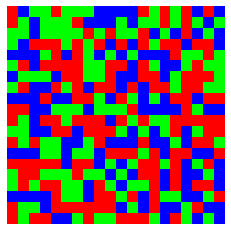

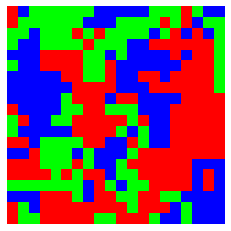

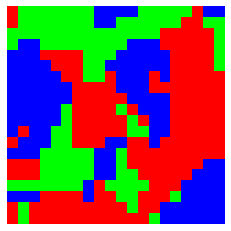

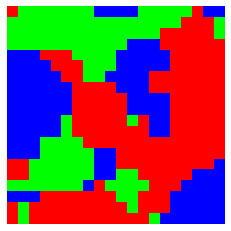

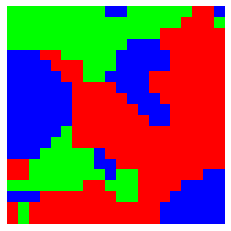

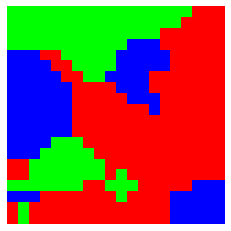

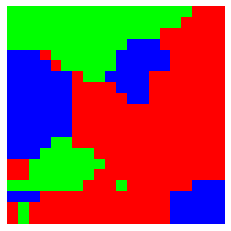

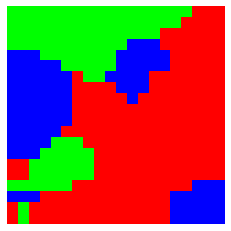

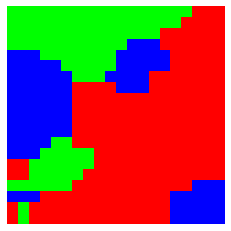

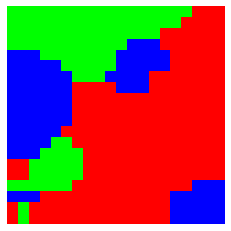

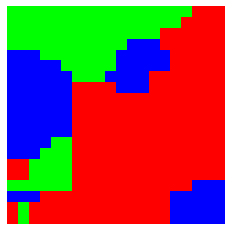

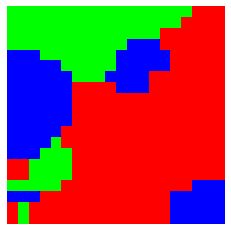

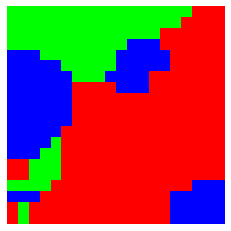

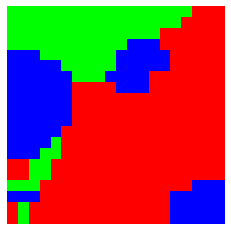

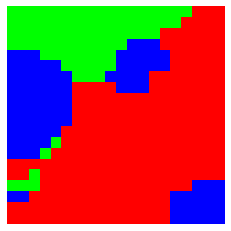

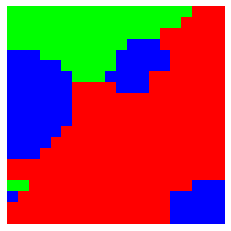

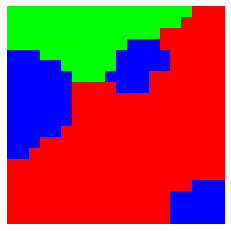

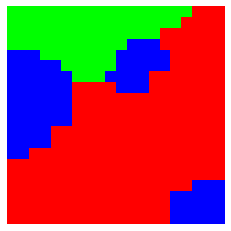

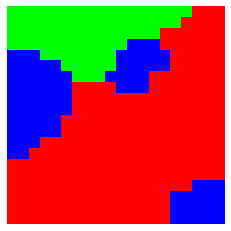

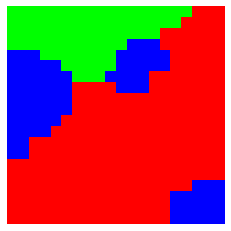

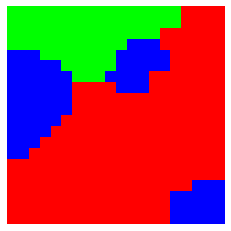

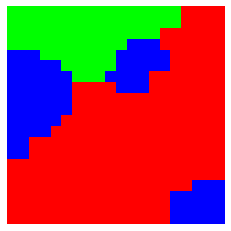

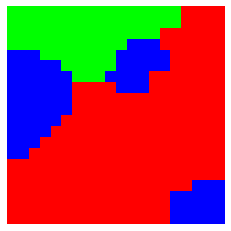

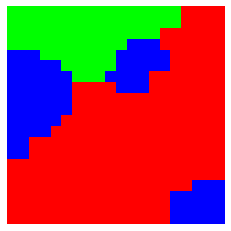

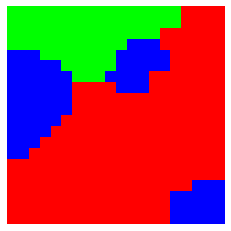

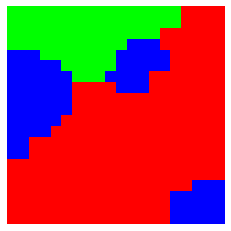

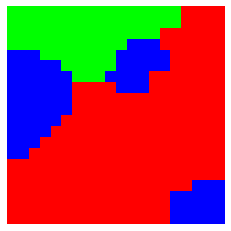

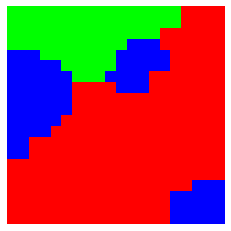

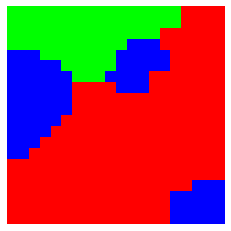

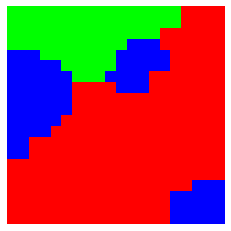

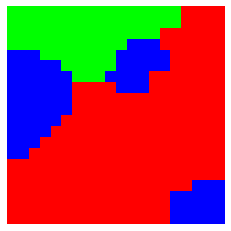

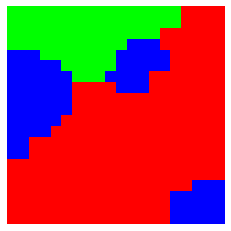

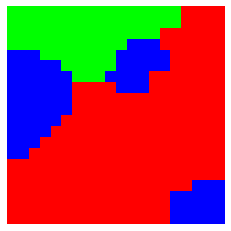

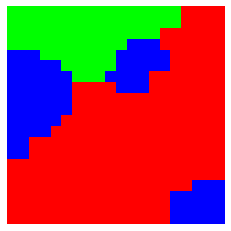

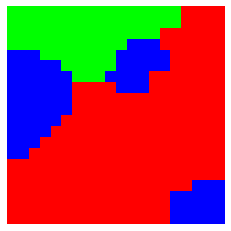

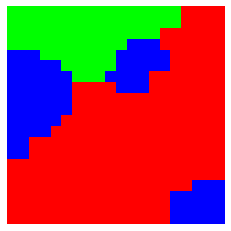

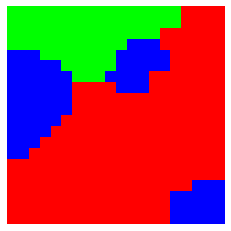

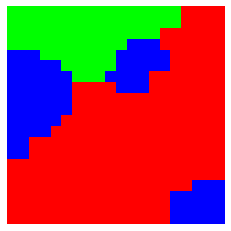

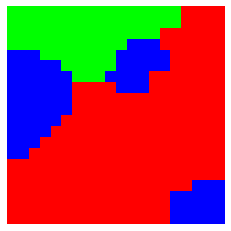

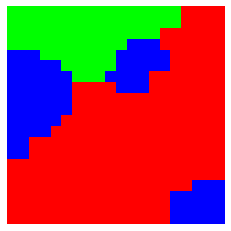

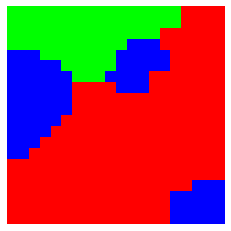

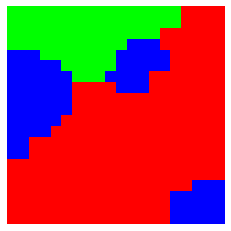

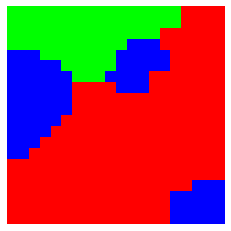

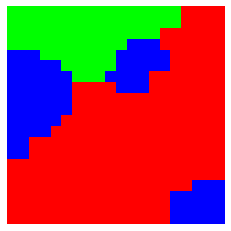

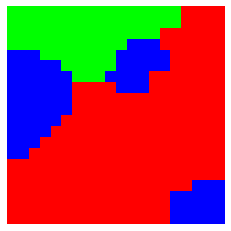

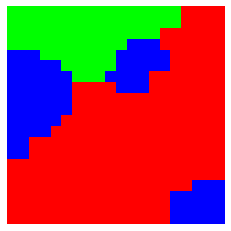

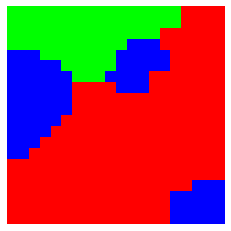

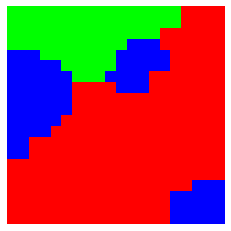

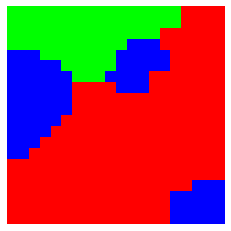

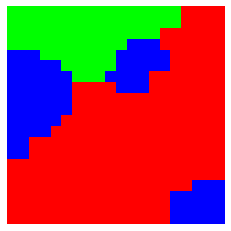

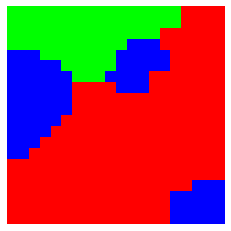

In [21]:
mapy_opinii(tableSave, l)